# Assignment 2: Data Science and Big Data Analysis (COSC 5340)

# <span style="font-family:cursive; color:#a45e8b;"><b>Shiv Hari Baral (L20588331) </b></span>

## Dataset
[Abalone Age Prediction Data Set](https://archive.ics.uci.edu/dataset/1/abalone)

## Data Set Information

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


Attribute Information:

| **<span style="color: #5d9283;">Name</span>**            | **<span style="color: #fcaf4d;">Data Type</span>**    | Measurement Unit  | Description                               |
|---------------------------------------------------------|-------------------------------------------------------|-------------------------------------------------------------|------------------------------------------|
| **<span style="color: #5d9283;">Sex</span>**             | <span style="color: #fcaf4d;">nominal</span>           | --                                                          | M, F, and I (infant)                     |
| **<span style="color: #5d9283;">Length</span>**          | <span style="color: #fcaf4d;">continuous</span>        | mm                                                          | Longest shell measurement                |
| **<span style="color: #5d9283;">Diameter</span>**        | <span style="color: #fcaf4d;">continuous</span>        | mm                                                          | Perpendicular to length                  |
| **<span style="color: #5d9283;">Height</span>**          | <span style="color: #fcaf4d;">continuous</span>        | mm                                                          | With meat in shell                       |
| **<span style="color: #5d9283;">Whole weight</span>**    | <span style="color: #fcaf4d;">continuous</span>        | grams                                                       | Whole abalone                            |
| **<span style="color: #5d9283;">Shucked weight</span>**  | <span style="color: #fcaf4d;">continuous</span>        | grams                                                       | Weight of meat                           |
| **<span style="color: #5d9283;">Viscera weight</span>**  | <span style="color: #fcaf4d;">continuous</span>        | grams                                                       | Gut weight (after bleeding)              |
| **<span style="color: #5d9283;">Shell weight</span>**    | <span style="color: #fcaf4d;">continuous</span>        | grams                                                       | After being dried                        |
| **<span style="color: #5d9283;">Rings</span>**           | <span style="color: #fcaf4d;">integer</span>           | --                                                          | +1.5 gives the age in years             |
  



# <span style="font-family:cursive; color:#0F2557;"><b>1. Importing Libraries</b></span>

In [1]:
#Load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings('ignore')

# <span style="font-family:cursive; color:#0F2557;"><b>2. Loading Data</b></span>

In [2]:
#Load dataset
col_name = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv(r"D:\bigdata\assignment2\abalone.data",names = col_name)
numeric_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [3]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 4177 observations with 9 features.


In [4]:
#Check top5 data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
#Data Information check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
#Check for null value
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
#Description on data
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


- No missing values in the dataset.<br>
        - All numerical features except 'sex'.<br>
        

# <span style="font-family:cursive; color:#0F2557;"><b>3. Count of catergorical attributes</b></span>

In [9]:
df['Sex'].sort_values().value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [10]:
num_attribute = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']


# <span style="font-family:cursive; color:#0F2557;"><b>4. Compute Mean, Median, Mode, Standard Deviation for each attribute.</b></span>

In [11]:
#Using function to find mean,median and standard deviation
def statistics(x):
    mean = x.mean()
    median = x.median()
    std = x.std()
    f.write("\n\tMean: %f "%mean)
    f.write("\n\tMedian: %f"%median)
    f.write("\n\tStandard Deviation: %f\n"%std)

# <span style="font-family:cursive; color:#0F2557;"><b>5. Compute 1st quartile, 3rd quartile, range and variance for each attribute</b></span>

In [12]:
#Calculating the 1st quartile, 3rd quartile, range and variance
def stat(x):
    f.write("\n\tFirst Quartile: %f "%x.quantile(0.25))
    f.write("\n\tThird Quartile: %f "%x.quantile(0.75))
    f.write("\n\tRange: %f "%(x.max()-x.min()))
    f.write("\n\tVariance: %f\n"%x.var())


# <span style="font-family:cursive; color:#0F2557;"><b>6. Compute Mean, Median, Mode, Standard Deviation for each attribute.</b></span>

In [13]:
#Calculating the AAD and MAD
def func(x):
    s = []
    s.append(abs(x-x.mean()))
    f.write("\n\tAAD: %f "%(np.mean(s)))
    f.write("\n\tMAD: %f \n\n"%(np.median(s)))

In [14]:
#Calling all the methods and writing to a file 
f = open ("D:\\bigdata\\assignment2\\outputfile.txt","w+")
for i in range(len(num_attribute)):
    f.write("\nAttribute: "+num_attribute[i]+"\n")
    statistics(df[num_attribute[i]])
    stat(df[num_attribute[i]])
    func(df[num_attribute[i]])
f.close()

In [15]:
numerical_features = df.select_dtypes(include=['number'])
categorical_features = df.select_dtypes(include=['object', 'category'])

In [16]:
numerical_features

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10



# <span style="font-family:cursive; color:#0F2557;"><b>7. Data Visualization.</b></span>

In [17]:
# # Function to Plot Single Pie and Bar Plot
palette = sns.color_palette("husl", 8)
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]}) 

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,) 
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()

### Target column (Rings) distribution

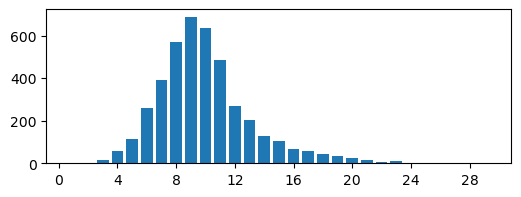

In [18]:
vc = df.Rings.value_counts()
plt.figure(figsize=(6, 2))
plt.bar(vc.index, vc)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [19]:
num_cols = list(df._get_numeric_data())
cat_cols = list(df.drop(num_cols, axis = 1))
target='Rings'
num_cols.remove(target)

In [20]:
num_cols

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [21]:
cat_cols

['Sex']

### Histrogram distribution of numerical columns

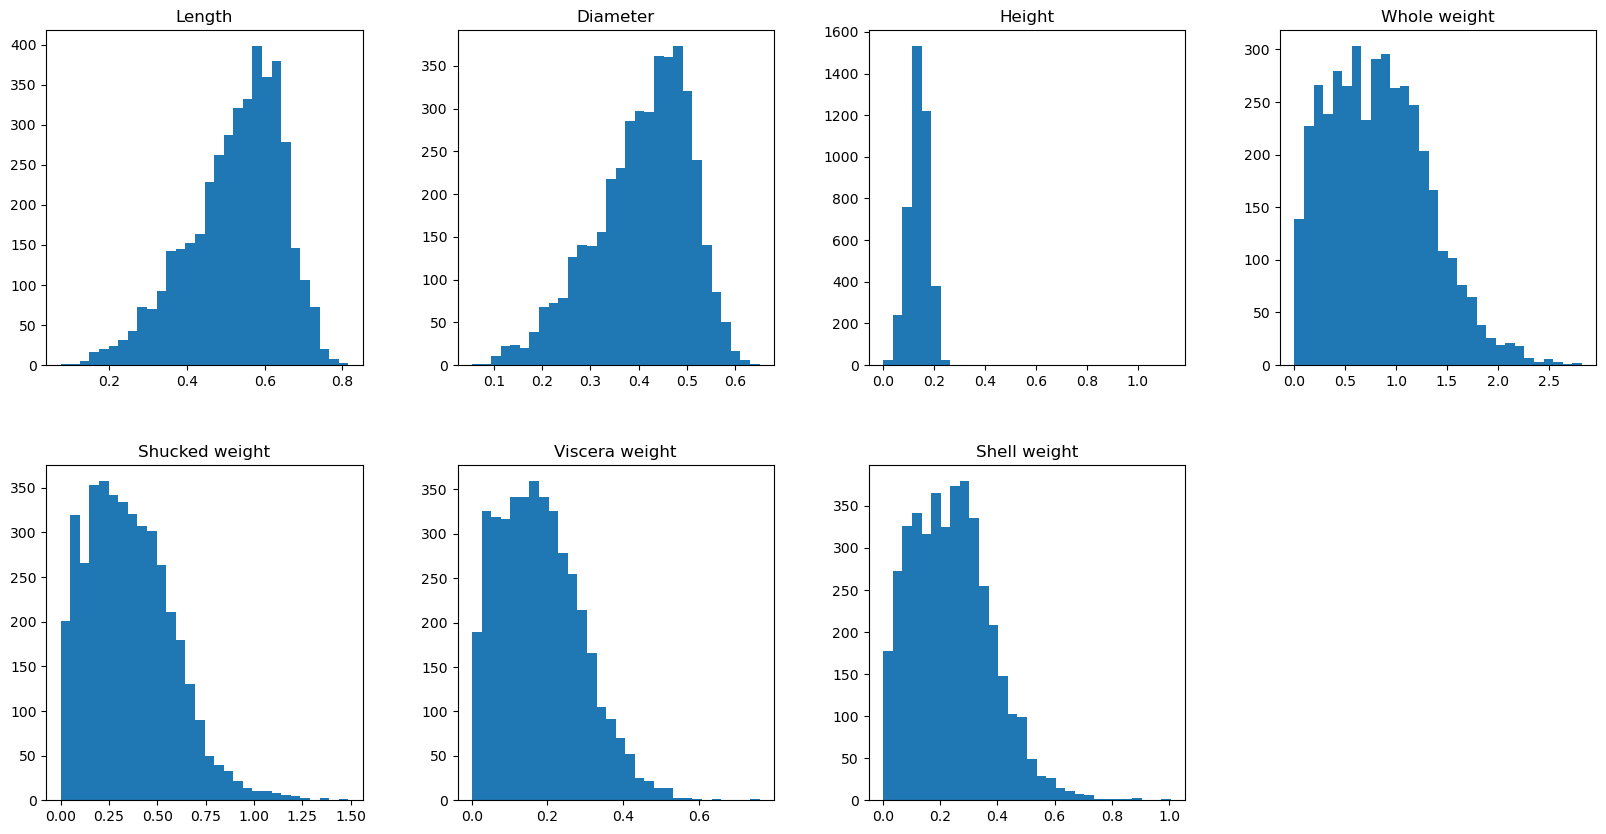

In [22]:
df[num_cols].hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)
# Save the figure
plt.savefig('distribution_using_histograms.png')
# Show the plot
plt.show()

The histogram grid visualizes the distribution of values for each numerical feature in the Abalone Age Prediction Dataset.
Each histogram represents a different feature, showing the frequency or count of data points within specified value ranges (bins).

Length, Diameter, Height: These features show a relatively normal distribution, with most abalones having lengths, diameters, and heights clustered around certain values.
This suggests that there might be common sizes or ranges of sizes among abalones in the dataset.
Whole Weight, Shucked Weight, Viscera Weight, Shell Weight: These features also exhibit a somewhat normal distribution,
indicating that the weights of various parts of the abalones are concentrated around certain values.

Rings: The histogram for the "Rings" feature, which is a proxy for the age of the abalones, shows a skewed distribution towards lower values.
This is expected, as younger abalones would be more common in a population.

### Box plot for outlier detection.

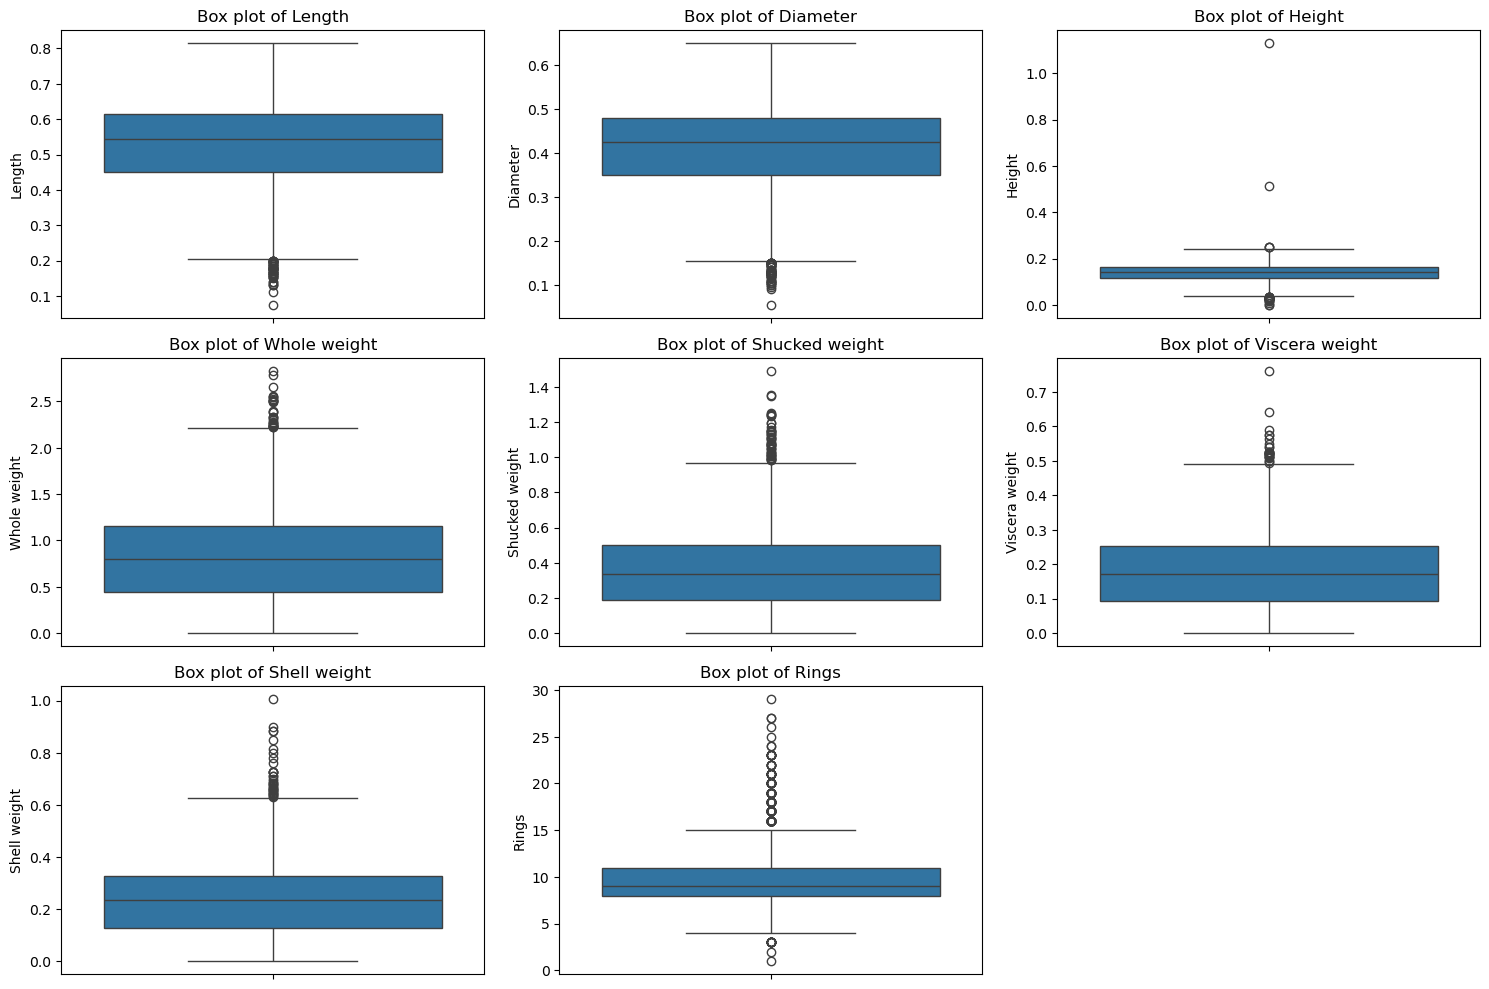

In [23]:
#check outliers
# Box plots for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.savefig('box_plot_for_outlier_detection.png')
plt.show()

To describe the outliers for each attribute based on the box plot:

Length: The outliers for length are relatively few. They represent abalones that are unusually long compared to the majority of the dataset.

Diameter: Similar to length, the outliers for diameter represent abalones that have a significantly larger diameter than the majority.

Height: The outliers for height are also limited, indicating abalones with unusually large heights compared to the rest of the dataset.

Whole Weight: There are more outliers for whole weight, suggesting abalones with much higher weights compared to the majority.

Shucked Weight: Similar to whole weight, there are outliers for shucked weight, indicating abalones with exceptionally high shucked weights.

Viscera Weight: The outliers for viscera weight represent abalones with unusually high viscera weights compared to the rest of the dataset.

Shell Weight: There are outliers for shell weight, indicating abalones with significantly higher shell weights compared to the majority.

Rings: The outliers for rings represent abalones that are much older than the majority of the dataset, indicating a few abalones with exceptionally high ring counts.

### Pair plot for overall distribution

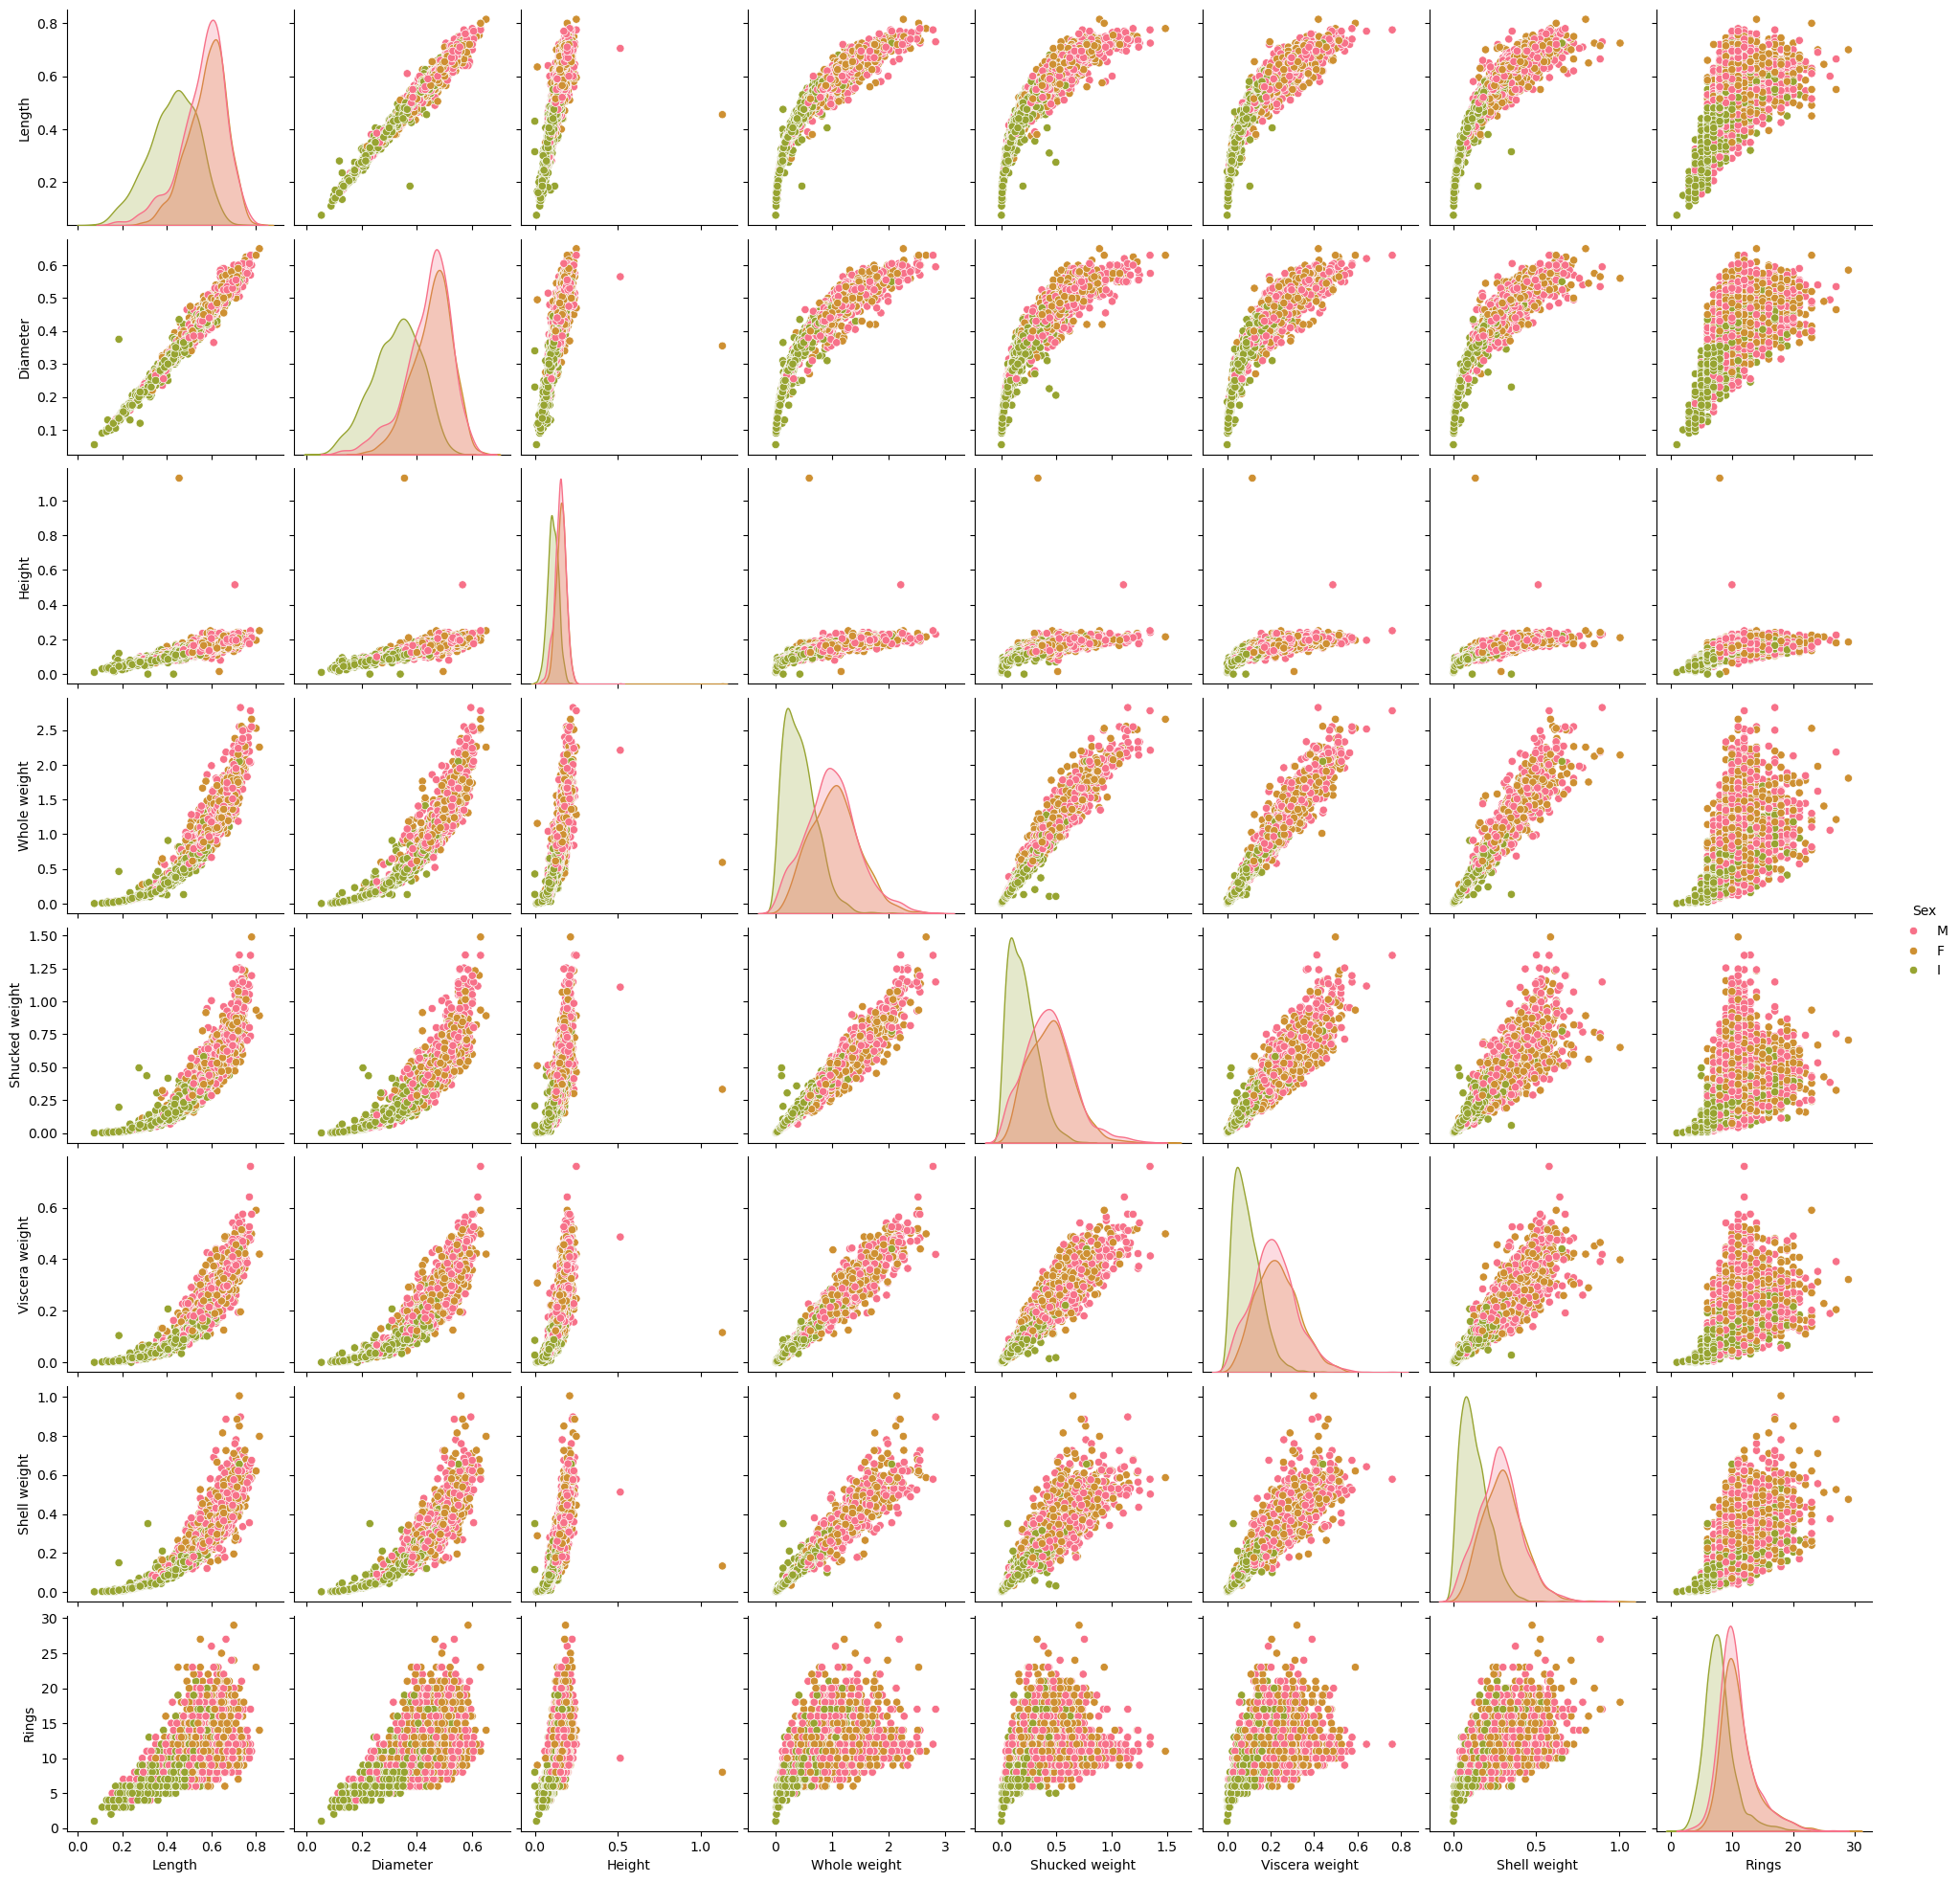

In [24]:
#pair plots
# Cols to Plot 
columns_to_plot = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

# Data Columns
data_to_plot = df[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Sex' column
sex_colors = {'M': palette[0] , 'F': palette[1], 'I': palette[2]}  

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Sex', palette=sex_colors)
plt.savefig('pair_plot.png')
plt.show()

The pair plot above visualizes the relationships between pairs of features in the Abalone Age Prediction Dataset. Each scatter plot shows the relationship between two variables, with different colors representing different categories of the 'Sex' attribute (M: Male, F: Female, I: Infant).

Length vs. Length: This plot shows a diagonal line, which indicates that it is a histogram. It represents the distribution of lengths for each sex category.

Diameter vs. Diameter: Similar to the length plot, this shows the distribution of diameters for each sex category.

Height vs. Height: This plot shows the distribution of heights for each sex category.

Whole weight vs. Whole weight: This plot shows the distribution of whole weights for each sex category.

Shucked weight vs. Shucked weight: Similar to the whole weight plot, this shows the distribution of shucked weights for each sex category.

Viscera weight vs. Viscera weight: This plot shows the distribution of viscera weights for each sex category.

Shell weight vs. Shell weight: This plot shows the distribution of shell weights for each sex category.

Rings vs. Rings: This plot shows the distribution of rings for each sex category.

In summary, the pair plot helps visualize the relationships and distributions of each feature in the dataset, with the added dimension of differentiating between sex categories.

### Categorical column distribution(in this case 'Sex" attribute)

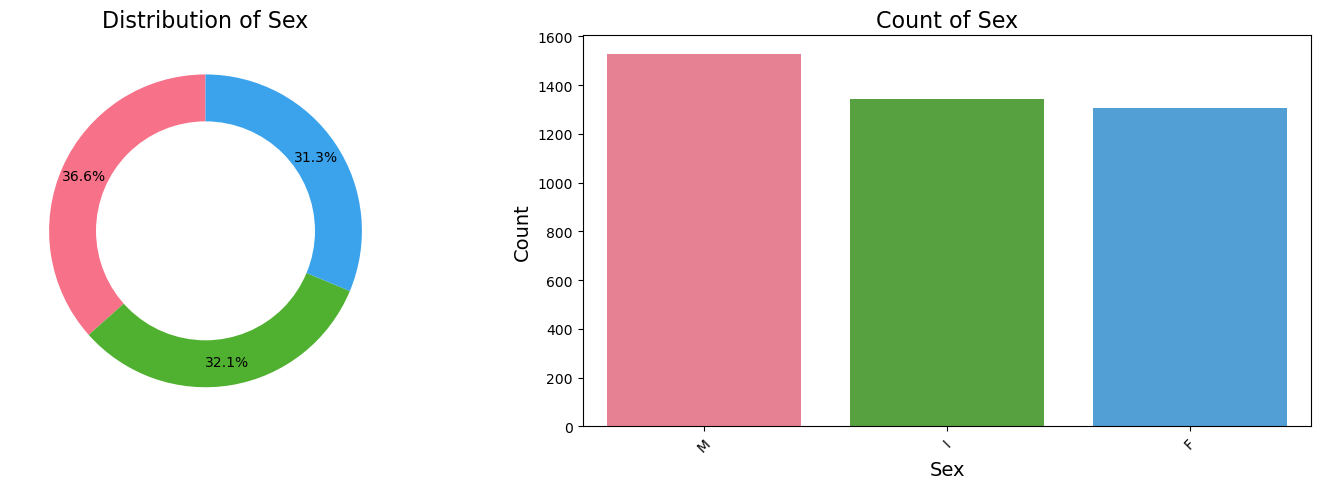

<Figure size 640x480 with 0 Axes>

In [38]:
single_plot_distribution('Sex', df)
plt.savefig('categorical_var_distribution.png')
plt.show()


The above plot is a visualization of the distribution of the 'Sex' attribute in the Abalone Age Prediction Dataset. It consists of two subplots:

Donut Pie Chart: This chart shows the distribution of the 'Sex' attribute using a donut pie chart. Each segment of the pie chart represents a different category of the 'Sex' attribute ('M' for Male, 'F' for Female, and 'I' for Infant). The size of each segment corresponds to the proportion of each category in the dataset.

Bar Chart: The bar chart displays the count of each category of the 'Sex' attribute. Each bar represents a category, and the height of the bar indicates the number of occurrences of that category in the dataset.

Interpretation:

The donut pie chart visually shows the relative proportions of each category within the 'Sex' attribute. It indicates that the dataset has a higher proportion of males compared to females and infants.
The bar chart provides a more precise count of each category, confirming that there are more males than females and infants in the dataset.

In [26]:

# ## Calculate the correlation matrix
# corr_matrix = df[numeric_cols].corr()

# # Create the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix')
# plt.show()

### Correlation matrix

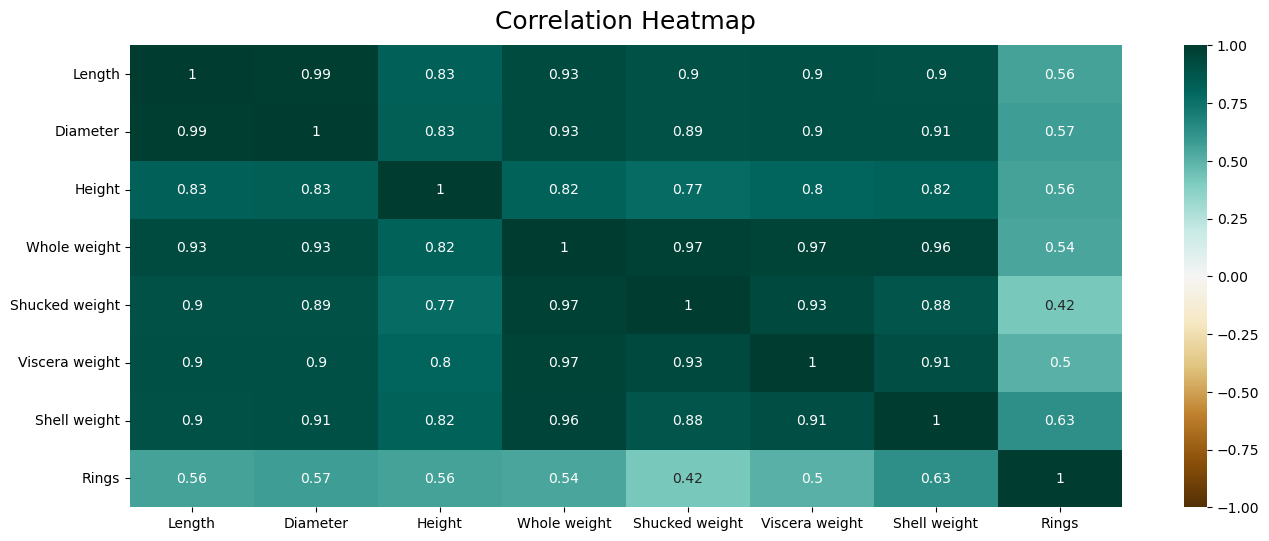

In [27]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[numeric_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

The correlation heatmap for the Abalone Age Prediction Dataset provides insights into the relationships between its numerical features. Here's an interpretation:

Length vs. Diameter: There is a strong positive correlation between the length and diameter of abalones, which is expected as they are likely to grow proportionally.

Length vs. Height: There is a moderate positive correlation between length and height, indicating that longer abalones tend to be taller.

Length vs. Whole Weight: There is a strong positive correlation between length and whole weight, suggesting that larger abalones tend to weigh more.

Diameter vs. Height: There is a moderate positive correlation between diameter and height, indicating that wider abalones tend to be taller.

Diameter vs. Whole Weight: There is a strong positive correlation between diameter and whole weight, similar to the relationship between length and whole weight.

Height vs. Whole Weight: There is a moderate positive correlation between height and whole weight, indicating that taller abalones tend to weigh more.

Shucked Weight vs. Whole Weight: There is a strong positive correlation between shucked weight (weight of meat) and whole weight, which is expected as the meat contributes to the overall weight.

Viscera Weight vs. Whole Weight: There is a moderate positive correlation between viscera weight (gut weight) and whole weight, indicating that the gut weight is proportional to the overall weight.

Shell Weight vs. Whole Weight: There is a strong positive correlation between shell weight and whole weight, suggesting that heavier abalones tend to have heavier shells.

### Scatter plots for relationships

In [28]:
# Scatter Plot to Show Realationship Bw 2 Cols
def advanced_scatter_plot(x_column, y_column, target_column, dataframe, savefig=None):
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=x_column, y=y_column, hue=target_column, data=dataframe, palette=palette)
    plt.title(f'Scatter Plot of {x_column} vs {y_column} Hue by {target_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.legend(title=target_column)
    plt.grid(True)
    
    if savefig:
        plt.savefig(savefig, dpi=300, bbox_inches='tight')
    else:
        plt.show()


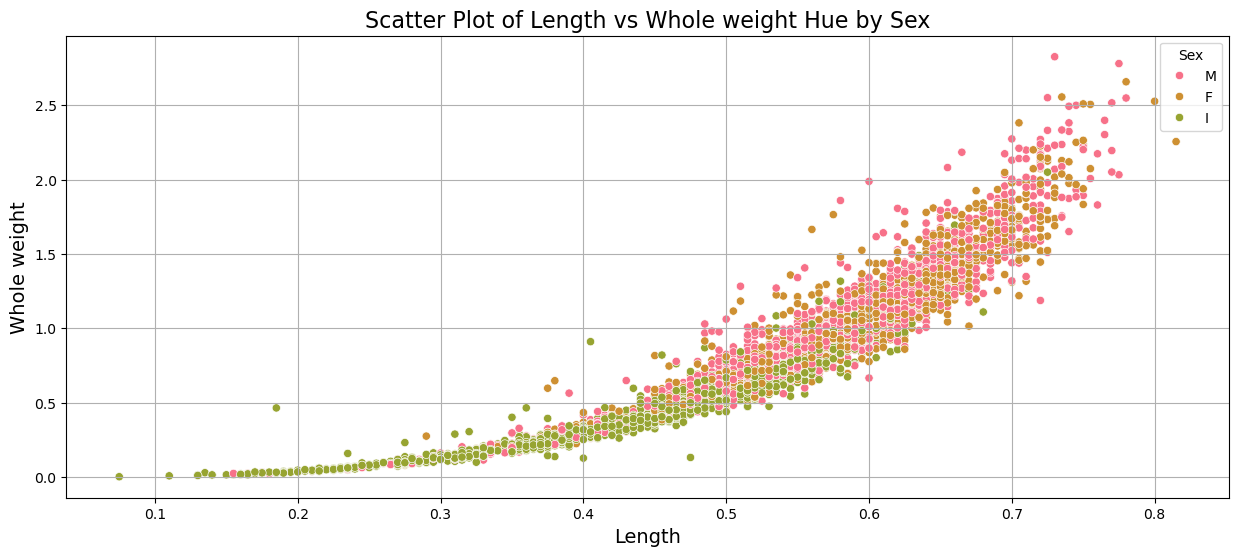

In [29]:
# Scatter Plot | to Show Lenght vs Whole Weight RealtionShip
# Scatter Plot | to Show Length vs Whole Weight Relationship
advanced_scatter_plot('Length', 'Whole weight', 'Sex', df, savefig='scatterplot_length_vs_whole-weight.png')

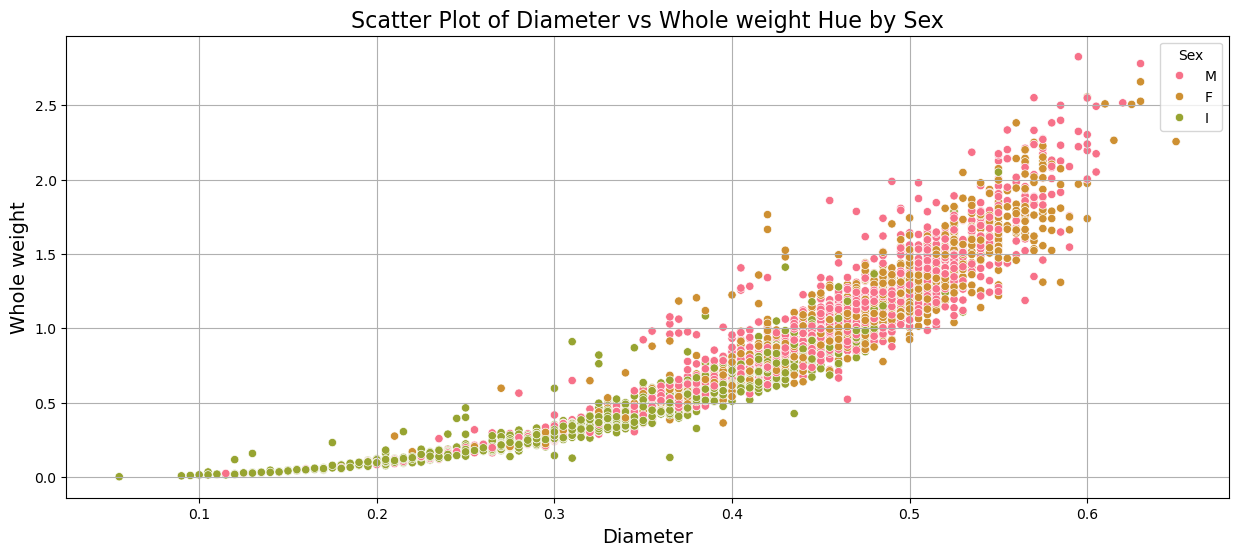

In [30]:
# Scatter Plot | to Show Diameter vs Whole Weight RealtionShip
advanced_scatter_plot('Diameter', 'Whole weight', 'Sex', df,savefig='scatterplot_Diameter_vs_whole-weight.png')

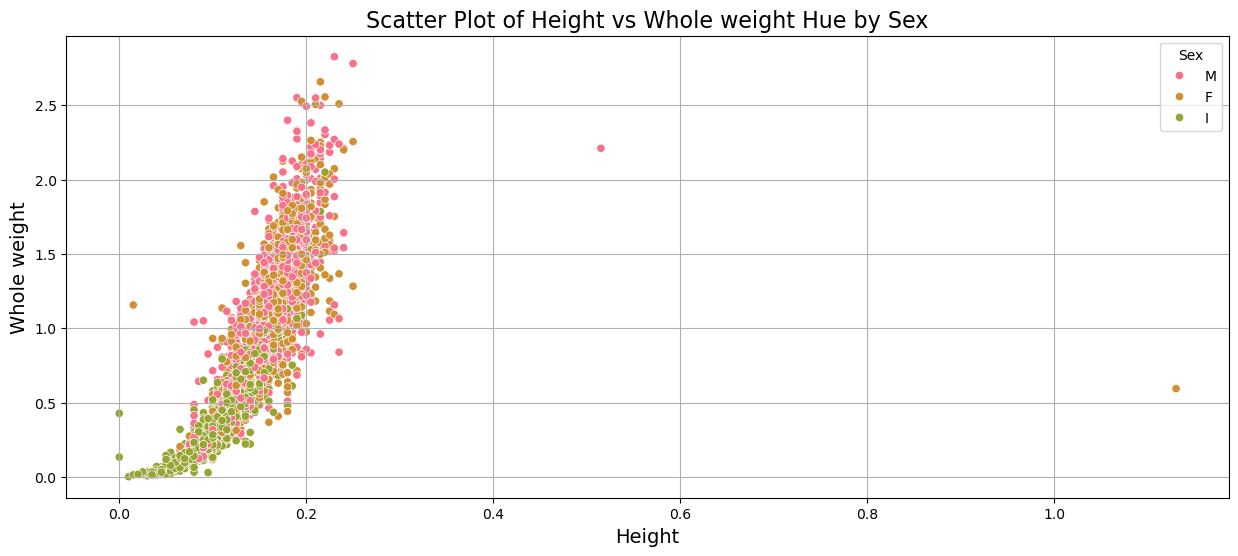

In [31]:
# Scatter Plot | to Show Height vs Whole Weight RealtionShip
advanced_scatter_plot('Height', 'Whole weight', 'Sex', df,savefig='scatterplot_Height_vs_whole-weight.png')

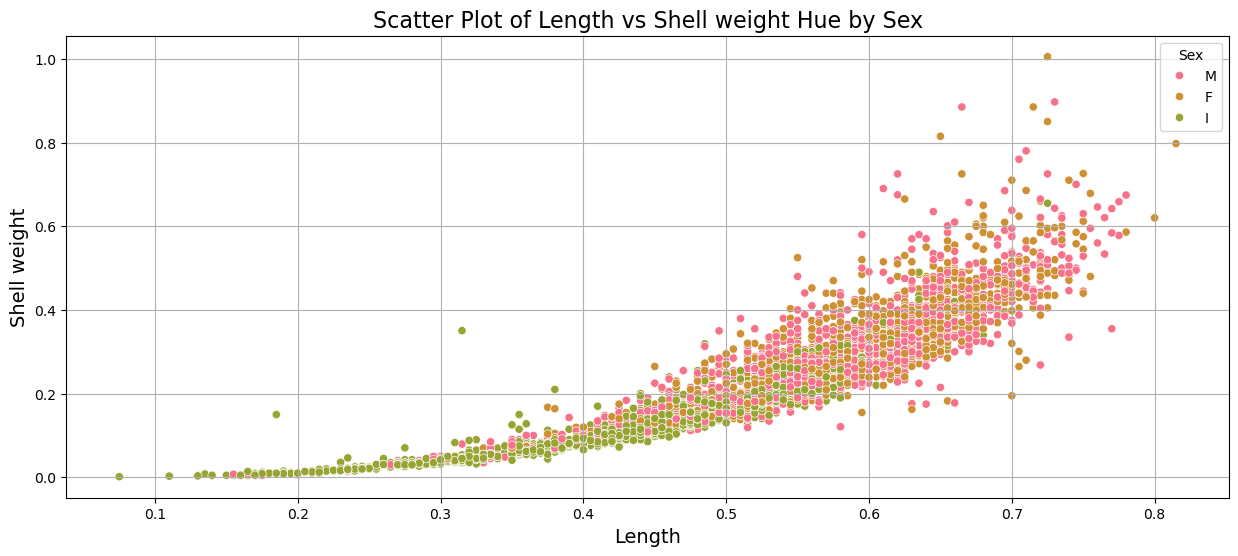

In [32]:
# Scatter Plot | to Show Height vs Shell weight RealtionShip
advanced_scatter_plot('Length', 'Shell weight', 'Sex', df,savefig='scatterplot_length_vs_shell-weight.png')

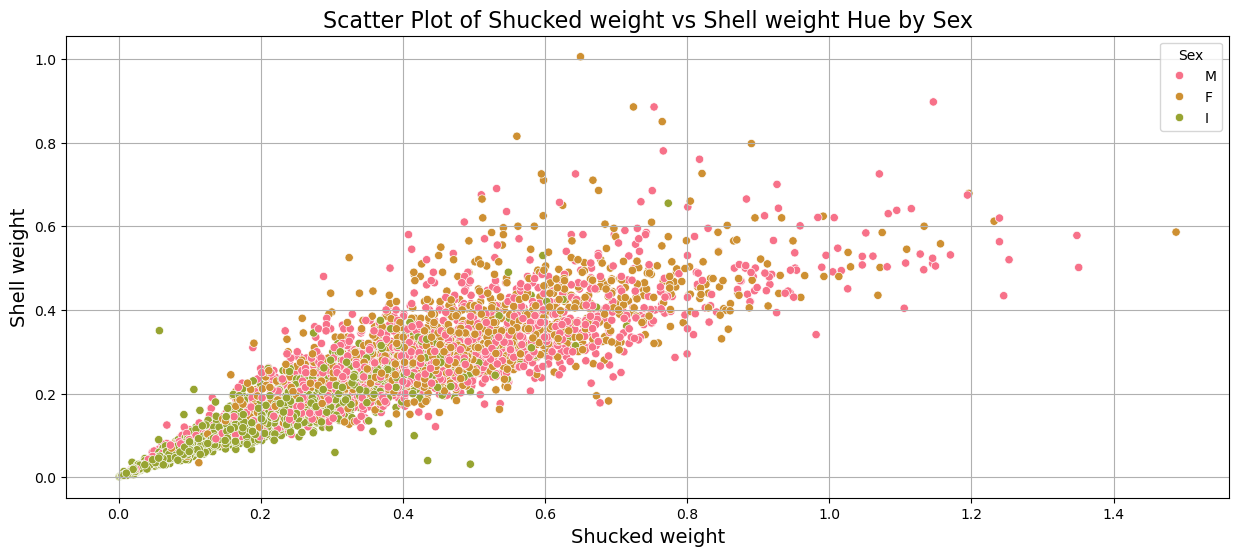

In [33]:
# Scatter Plot | to Show Shell Volume vs Shell weight RealtionShip
advanced_scatter_plot('Shucked weight', 'Shell weight', 'Sex', df,savefig='scatterplot_Shucked-weight_vs_shell-weight.png')

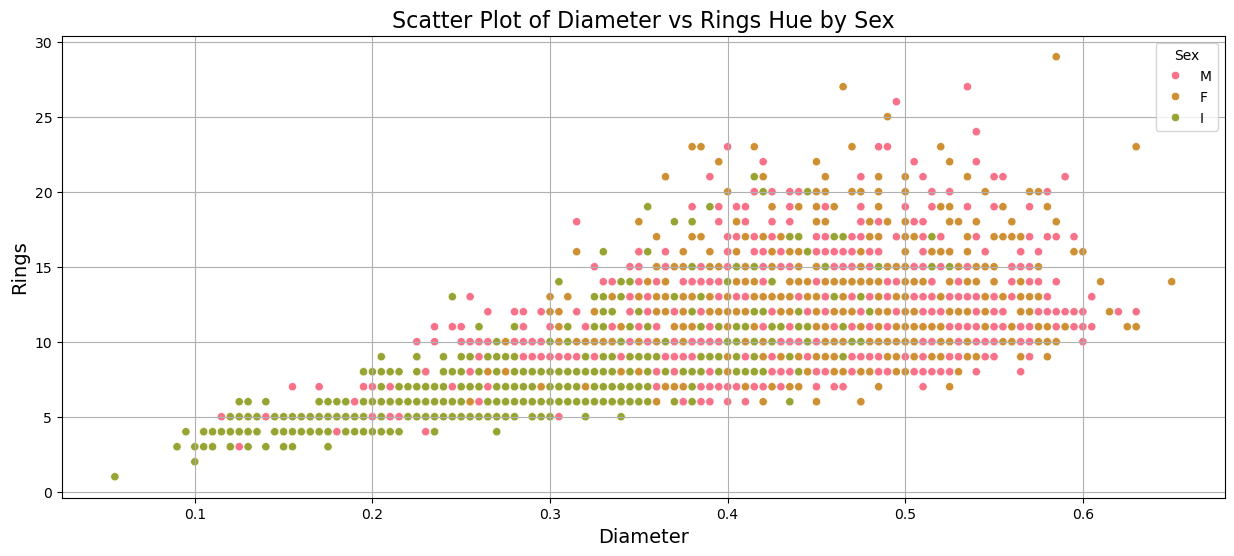

In [34]:
# Scatter Plot | to Show Diameter vs Meat Ratio RealtionShip
advanced_scatter_plot('Diameter', 'Rings', 'Sex', df,savefig='scatterplot_diameter_vs_rings.png')

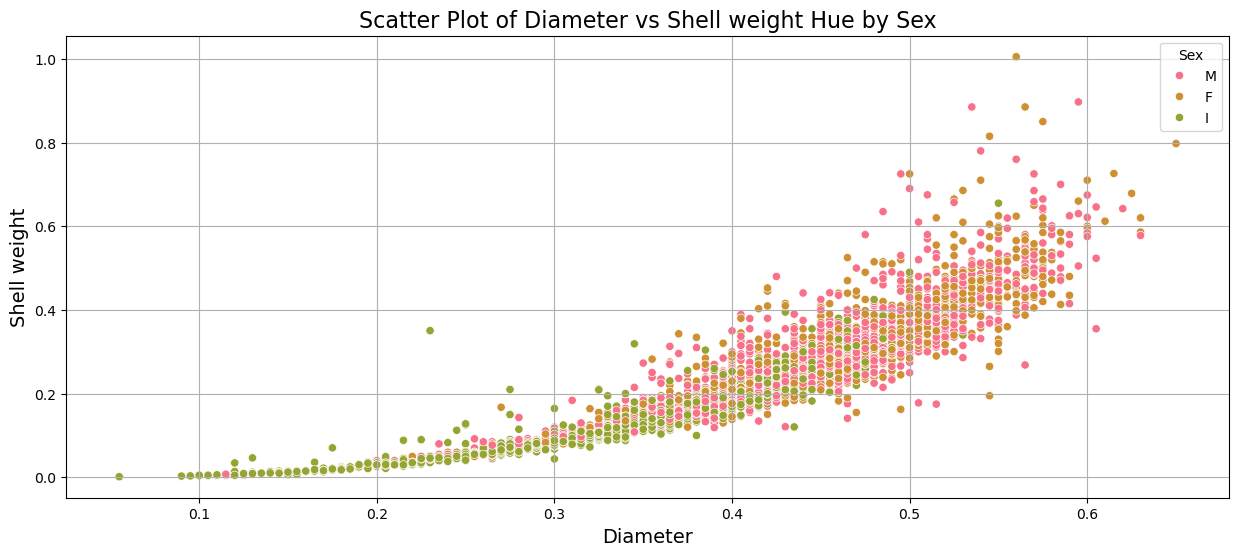

In [35]:
# Scatter Plot | to Show Diameter vs Shell weight RealtionShip
advanced_scatter_plot('Diameter', 'Shell weight', 'Sex', df,savefig='scatterplot_diameter_vs_shell-weight.png')

### Different plots for visualization

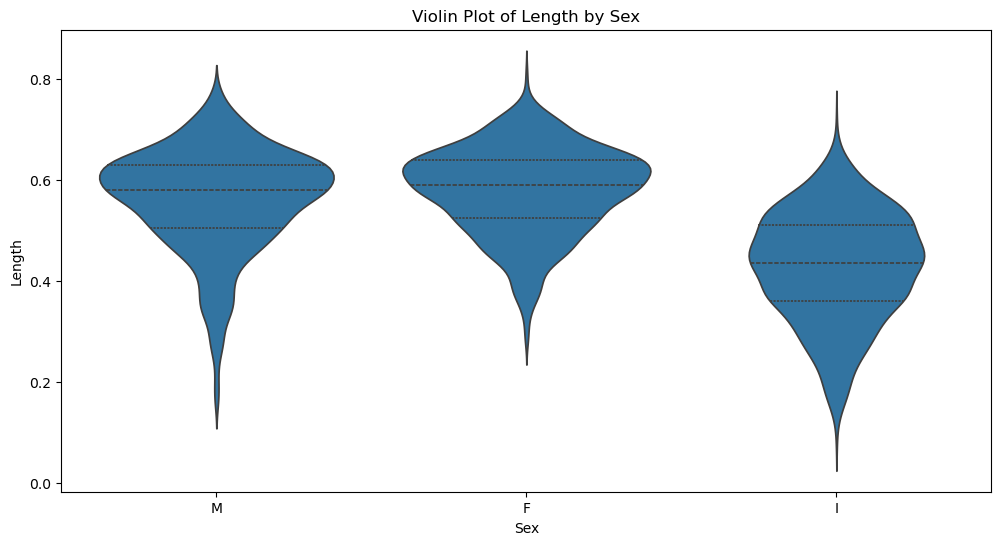

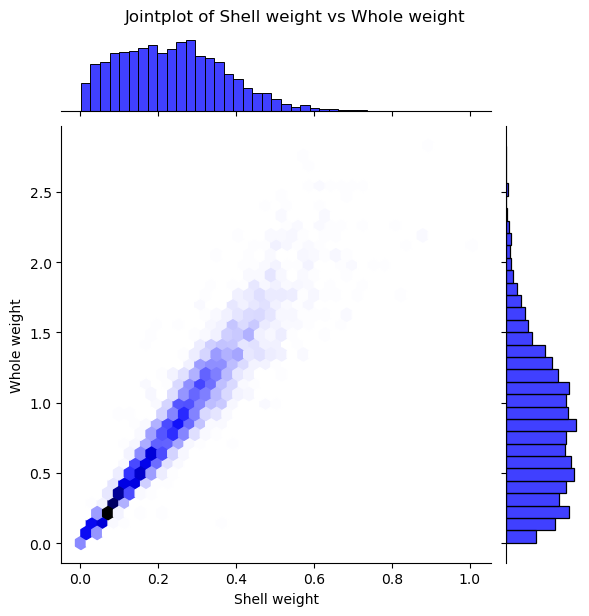

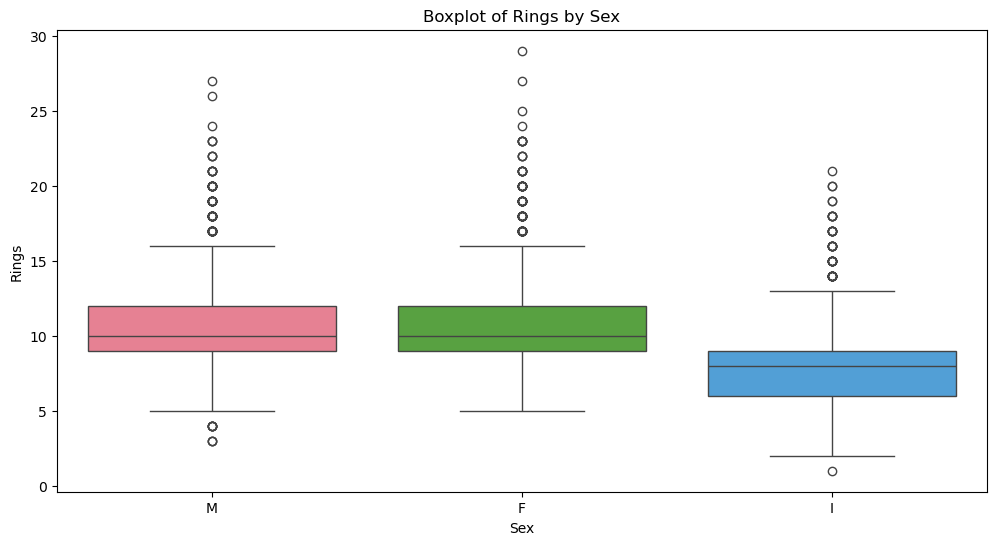

In [36]:
# Color palette
palette = sns.color_palette("husl", 3)

# Advanced visualization for EDA
def advanced_visualization(df):

    # Violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Sex', y='Length', data=df, inner='quartile')
    plt.title('Violin Plot of Length by Sex')
    plt.savefig('violin_plot.png')
    plt.show()

    # Jointplot
    sns.jointplot(x='Shell weight', y='Whole weight', data=df, kind='hex', color='blue')
    plt.suptitle('Jointplot of Shell weight vs Whole weight', y=1.02)
    plt.savefig('joint_plot.png')
    plt.show()
 

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Sex', y='Rings', data=df, palette=palette)
    plt.title('Boxplot of Rings by Sex')
    plt.savefig('boxplot.png')
    plt.show()

# Call the function to display the visualizations
advanced_visualization(df)
